In [ ]:
#libraries requires:pandas geopandas descartes geoplot

In [30]:
pip install pandas geopandas descartes geoplot shapely


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import folium

In [12]:
seattle_coord = (47.7511, 120.7401)

df = pd.DataFrame(
    {'City': "seattle",
     'Latitude': [seattle_coord[0]],
     'Longitude': [seattle_coord[1]]
                   })
df.head()

,City,Latitude,Longitude
0,seattle,47.7511,120.7401


In [15]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(-df.Longitude, df.Latitude), crs = 4326)

In [35]:
usa = gpd.read_file("states/states.shp")

In [36]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


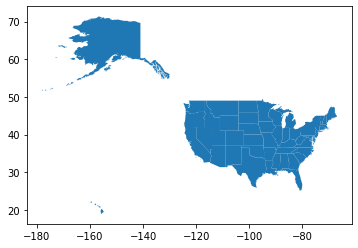

In [37]:
usa.plot()

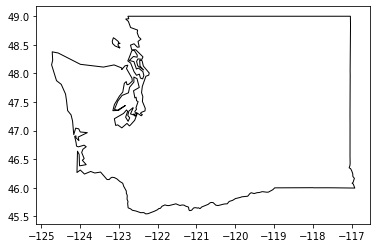

In [41]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")

In [51]:
housing_columns = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated' ,'zipcode', 'lat', 'long' ]
housing_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing.csv', usecols=housing_columns)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,3,1.00,1180,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045


In [52]:
property_columns = [ 'BuildingTypeName', 'PropertyTypeEPA', 'City', 'Zip', 'Neighborhood', 'Latitude', 'Longitude' ]
property_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/property_types.csv', usecols=property_columns)
property_data.head()

,BuildingTypeName,PropertyTypeEPA,City,Zip,Neighborhood,Latitude,Longitude
0,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.612190,-122.337997
1,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613106,-122.333358
2,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613349,-122.337699
3,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.614216,-122.336609
4,NonResidential,Hotel,SEATTLE,98121,DOWNTOWN,47.613754,-122.340924


In [53]:
zip_property_data = property_data.Zip.unique()
zip_housing_data = housing_data.zipcode.unique()
zip_comon = list(set(zip_property_data).intersection(zip_housing_data))
print(zip_comon)

[98177, 98178, 98199, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98155]


In [54]:
property_data = property_data[property_data.BuildingTypeName.map(lambda e: e in ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus'])]
property_data = property_data[property_data.City.map(lambda e: e == 'SEATTLE')]
property_data = property_data[property_data.Zip.map(lambda e: e in zip_comon)]
property_data = property_data[property_data.PropertyTypeEPA.map(lambda e: e != 'Hotel')]

property_data = property_data.drop(['BuildingTypeName', 'City'], axis=1)
property_data = property_data.rename(columns={'PropertyTypeEPA': 'property_type', 'Zip': 'zip', 'Neighborhood':'neighborhood', 'Latitude': 'latitude', 'Longitude':'longitude'})

property_data.dropna(inplace=True)
property_data.reset_index(drop=True)

property_data.head()

housing_data.to_csv(r"C:\Users\mihai\lab\housing_data_cleaned.csv", index = False, header=True)

In [55]:
housing_data.sqft_living = housing_data.sqft_living.apply(lambda e: round(e * 0.092))
housing_data.sqft_lot = housing_data.sqft_lot.apply(lambda e: round(e * 0.092))
housing_data.sqft_basement = housing_data.sqft_basement.apply(lambda e: round(e * 0.092))

housing_data = housing_data[housing_data.zipcode.map(lambda e: e in zip_comon)]

housing_data = housing_data.rename(columns={'sqft_living': 'm2_living', 'sqft_lot':'m2_lot', 'sqft_basement':'m2_basement', 'zipcode':'zip'})

housing_data.dropna(inplace=True)
housing_data.reset_index(drop=True)

housing_data.head()



,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
3,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
8,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
11,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292


In [60]:
houses = pd.read_csv("housing_data_cleaned.csv")
houses

,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
2,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
3,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
4,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,475000,3,2.50,121,119,2.0,0,3,8,12,2008,0,98116,47.5773,-122.409
7977,360000,3,2.50,141,104,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346
7978,400000,4,2.50,213,535,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362
7979,402101,2,0.75,94,124,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299


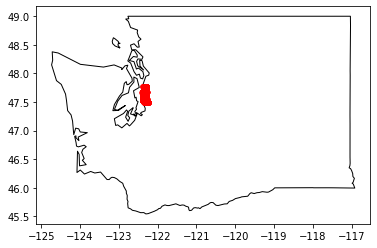

In [88]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")
for i, row in houses.iterrows():
  plt.plot(row['long'], row['lat'], marker=".", color="red")
plt.show()

In [97]:
seattle_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')
for i, row in houses.head(100).iterrows(): 
  lat = row['long']
  long = row['lat']
  marker = folium.Marker([lat, long]).add_to(waterfront_map)
waterfront_map